# Install below packages

In [ ]:
!pip install numpy pandas matplotlib ta streamlit yfinance prophet plotly

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=e267e620e2153d5e880830e1f8dc8285bd35fa43aa881a8593d6ab3500ff03e1
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
!pip install pyngrok

In [ ]:
import sys
import os
from datetime import date, datetime, timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
import argparse
import webbrowser

In [ ]:
ticker = "ADANIENT.NS"

try:
    df = yf.download(ticker, period="1y")  # Fetch last 5 years' data
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.sort_values(by ='Date', ascending = False).head()

Price,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
Date,,,,,
2025-03-21,2362.800049,2389.550049,2338.000000,2343.800049,1101126
2025-03-20,2339.300049,2348.000000,2299.000000,2348.000000,2587050
2025-03-19,2318.649902,2342.000000,2311.050049,2319.949951,1030345
2025-03-18,2252.699951,2252.699951,2252.699951,2252.699951,0
2025-03-17,2252.699951,2286.899902,2198.000000,2200.000000,927737


Key Definitions
Open: The opening price of a stock at the beginning of a trading day.

High: The highest price a stock reaches during a trading day.

Low: The lowest price a stock reaches during a trading day.

Close: The closing price of a stock at the end of a trading day.

Adj Close: The adjusted closing price of a stock, which takes into account any dividends, stock splits, or other corporate actions that occurred during the day.

Volume: The number of shares of a stock that were traded during a particular trading day. This is an important indicator of market activity and can provide insight into the level of buying and selling interest in a particular stock.

In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
Date,,,,,
2025-03-17,2252.699951,2286.899902,2198.000000,2200.000000,927737
2025-03-18,2252.699951,2252.699951,2252.699951,2252.699951,0
2025-03-19,2318.649902,2342.000000,2311.050049,2319.949951,1030345
2025-03-20,2339.300049,2348.000000,2299.000000,2348.000000,2587050
2025-03-21,2362.800049,2389.550049,2338.000000,2343.800049,1101126


In [ ]:
df.shape

(248, 5)

In [ ]:
df.dtypes

,,0
Price,Ticker,
Close,ADANIENT.NS,float64
High,ADANIENT.NS,float64
Low,ADANIENT.NS,float64
Open,ADANIENT.NS,float64
Volume,ADANIENT.NS,int64


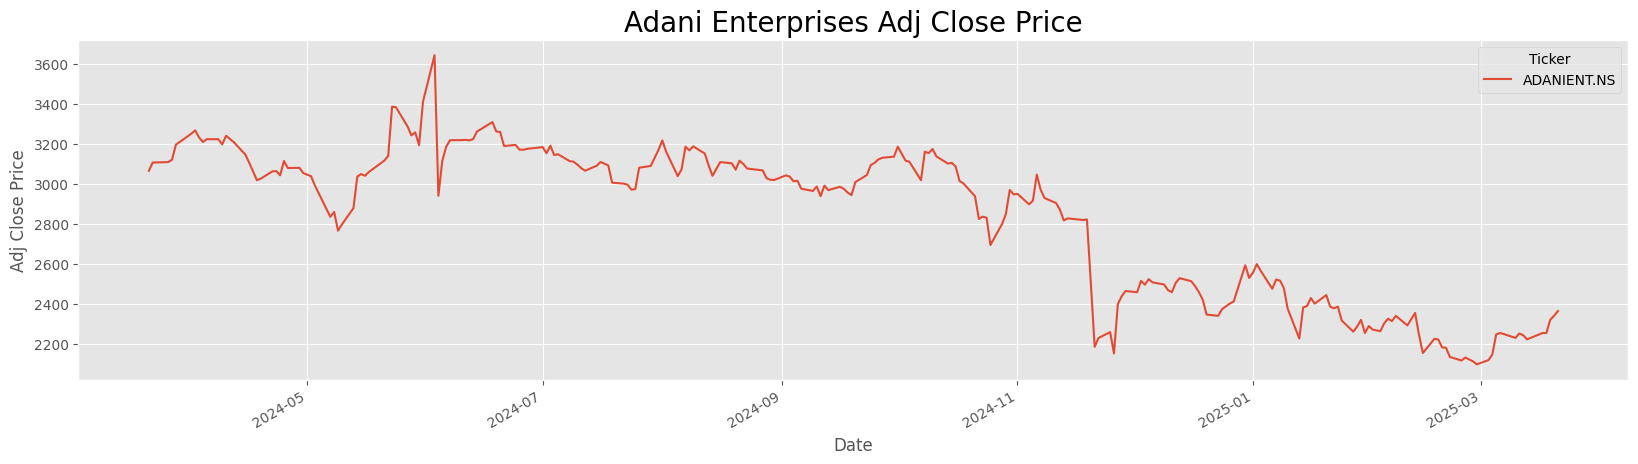

In [ ]:
df['Close'].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

**Day-to-day percentage change(Daily returns)**
Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days' closing prices. Let's say if the closing price of the stock yesterday was ₹500 and today the stock closed as ₹550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100.

In [ ]:
df['Day_Perc_Change'] = df['Close'].pct_change()*100
df.head()

Price,Close,High,Low,Open,Volume,Day_Perc_Change
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,
Date,,,,,,
2024-03-21,3065.263916,3105.847648,3058.366795,3088.304674,1175751,NaN
2024-03-22,3106.447266,3127.688700,3046.821408,3065.313950,951557,1.343550
2024-03-26,3108.696289,3170.671296,3087.854840,3099.250147,937103,0.072399
2024-03-27,3120.841553,3137.184815,3104.997844,3113.744317,900231,0.390687
2024-03-28,3195.811279,3235.695097,3095.501635,3132.736619,2327053,2.402228


In [ ]:
%%writefile stockfinal2.py
import streamlit as st
from datetime import date, datetime, timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# Configure page
st.set_page_config(
    page_title="Stock Analysis App",
    page_icon="📈",
    layout="wide"
)

# App title and description
st.title('📈 Stock Analysis App')
st.markdown("""
This app provides stock forecasting using Facebook's Prophet model and technical analysis tools.
""")

# Define available stock options
stocks = {
    "Google": "GOOGL",
    "Apple": "AAPL",
    "Microsoft": "MSFT",
    "Tesla": "TSLA",
    "Tata Motors": "TATAMOTORS.NS"
}

def fetch_data_from_yfinance(ticker, period='5y'):
    """Fetch stock data using yfinance"""
    try:
        # Get data for the specified period
        end_date = datetime.now()
        start_date = end_date - timedelta(days=1825)  # 5 years

        # Download data for forecast
        df = yf.download(ticker, start=start_date, end=end_date)

        if not df.empty and len(df) > 30:
            return df
        return None
    except Exception as e:
        st.error(f"Error fetching data from Yahoo Finance: {str(e)}")
        return None

def get_sample_data(ticker):
    """Generate sample stock data for demonstration"""
    seed_value = sum(ord(c) for c in ticker)
    np.random.seed(seed_value)

    end_date = datetime.now()
    start_date = end_date - timedelta(days=1825)
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')

    # Set initial price based on ticker
    start_price = {
        'AAPL': 150,
        'GOOGL': 2800,
        'MSFT': 300,
        'TSLA': 800
    }.get(ticker, 100)

    # Generate price data
    daily_returns = np.random.normal(0.0005, 0.02, len(date_range))
    price_series = start_price * (1 + daily_returns).cumprod()

    # Create DataFrame
    df = pd.DataFrame(index=date_range)
    df['Close'] = price_series
    df['Open'] = df['Close'].shift(1) * (1 + np.random.normal(0, 0.005, len(df)))
    df['High'] = df[['Open', 'Close']].max(axis=1) * (1 + abs(np.random.normal(0, 0.003, len(df))))
    df['Low'] = df[['Open', 'Close']].min(axis=1) * (1 - abs(np.random.normal(0, 0.003, len(df))))
    df['Adj Close'] = df['Close']
    df['Volume'] = np.random.randint(100000, 10000000, len(df))

    return df.fillna(method='bfill')

def prepare_dataframe(df):
    """Prepare dataframe for Prophet model"""
    df = df.reset_index()
    result_df = pd.DataFrame()
    result_df['ds'] = df['Date']
    result_df['y'] = df['Close']
    return result_df

@st.cache_data(show_spinner=False)
def fetch_stock_data(stock_ticker, period='5y'):
    """Fetch stock data with fallback to sample data"""
    with st.spinner(f"Fetching data for {stock_ticker}..."):
        df = fetch_data_from_yfinance(stock_ticker, period)
        if df is not None and not df.empty and len(df) > 30:
            st.success(f"Successfully loaded data for {stock_ticker}")
            return prepare_dataframe(df), df

        st.warning(f"Using sample data for {stock_ticker}")
        sample_data = get_sample_data(stock_ticker)
        return prepare_dataframe(sample_data), sample_data

# Technical Analysis Functions
def trend(x):
    """Calculate trend based on percentage change"""
    if x > -0.5 and x <= 0.5:
        return 'Slight or No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'

def technical_analysis(df, ticker, period):
    """Perform technical analysis on the stock data"""
    # Ensure we're working with a dataframe that has Close as a column, not a series
    if isinstance(df, pd.Series):
        df = df.to_frame(name='Close')

    # Calculate percentage change
    df['Day_Perc_Change'] = df['Close'].pct_change() * 100
    df.dropna(inplace=True)
    df['Trend'] = df['Day_Perc_Change'].apply(lambda x: trend(x))

    # Plot Trends
    st.subheader("Market Trend Analysis")
    fig, ax = plt.subplots(figsize=(8, 6))
    trend_counts = df['Trend'].value_counts()
    trend_counts.plot.pie(autopct='%1.1f%%', ax=ax)
    ax.set_title(f"{ticker} - Trend Distribution")
    st.pyplot(fig)

    # Moving Averages
    st.subheader("Moving Averages")
    df['50_SMA'] = df['Close'].rolling(window=50, min_periods=1).mean()
    df['200_SMA'] = df['Close'].rolling(window=200, min_periods=1).mean()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df.index, df['Close'], color='k', label='Close Price')
    ax.plot(df.index, df['50_SMA'], color='b', label='50-day SMA')
    ax.plot(df.index, df['200_SMA'], color='g', label='200-day SMA')
    ax.set_title(f"{ticker} - Moving Averages")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    st.pyplot(fig)

    # RSI Indicator
    st.subheader("Relative Strength Index (RSI)")
    # Create a clean DataFrame for the RSI calculation
    df_rsi = pd.DataFrame(index=df.index)
    df_rsi['close'] = df['Close']
    # Use the ta-lib RSI function with the clean DataFrame
    rsi_indicator = RSIIndicator(close=df_rsi['close'], window=14)
    df['RSI'] = rsi_indicator.rsi()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df.index, df['RSI'], label='RSI', color='blue')
    ax.axhline(70, linestyle='--', color='red', label='Overbought (70)')
    ax.axhline(30, linestyle='--', color='green', label='Oversold (30)')
    ax.set_title(f"{ticker} - RSI")
    ax.set_xlabel("Date")
    ax.set_ylabel("RSI Value")
    ax.legend()
    st.pyplot(fig)

    # Bollinger Bands
    st.subheader("Bollinger Bands")
    # Create a clean DataFrame for the Bollinger Bands calculation
    df_bb = pd.DataFrame(index=df.index)
    df_bb['close'] = df['Close']
    # Use the ta-lib Bollinger Bands function with the clean DataFrame
    bollinger = BollingerBands(close=df_bb['close'], window=20, window_dev=2)
    df['BB_Middle'] = bollinger.bollinger_mavg()
    df['BB_Upper'] = bollinger.bollinger_hband()
    df['BB_Lower'] = bollinger.bollinger_lband()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df.index, df['Close'], label='Close Price', color='k')
    ax.plot(df.index, df['BB_Upper'], label='Upper Band', color='r')
    ax.plot(df.index, df['BB_Lower'], label='Lower Band', color='g')
    ax.fill_between(df.index, df['BB_Lower'], df['BB_Upper'], alpha=0.1, color='blue')
    ax.set_title(f"{ticker} - Bollinger Bands")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    st.pyplot(fig)

    # Data Preview
    st.subheader("Data Preview")
    st.dataframe(df.tail())

def forecast_analysis(df_train, raw_data, ticker, selected_stock, n_years):
    """Perform forecast analysis on the stock data"""
    period = n_years * 365

    st.header("Stock Price Forecast")

    # Display metrics
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Current Price", f"${df_train['y'].iloc[-1]:.2f}")
    with col2:
        st.metric("Trading Days", len(df_train))
    with col3:
        price_change = ((df_train['y'].iloc[-1] - df_train['y'].iloc[0]) / df_train['y'].iloc[0]) * 100
        st.metric("Total Return", f"{price_change:.1f}%")

    # Historical price chart
    st.subheader("Historical Price Data")
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df_train["ds"],
        y=df_train["y"],
        name="Price",
        line=dict(color='royalblue', width=1.5)
    ))

    if len(df_train) >= 30:
        ma30 = df_train['y'].rolling(window=30).mean()
        fig.add_trace(go.Scatter(
            x=df_train["ds"][29:],
            y=ma30[29:],
            name="30-Day MA",
            line=dict(color='orange', width=1.5, dash='dot')
        ))

    fig.update_layout(
        title=f"{selected_stock} Price History",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        template="plotly_white",
        xaxis_rangeslider_visible=True
    )
    st.plotly_chart(fig, use_container_width=True)

    # Forecast
    st.subheader("Price Forecast")
    with st.spinner("Generating forecast..."):
        m = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            changepoint_prior_scale=0.05
        )
        m.fit(df_train)
        future = m.make_future_dataframe(periods=period)
        forecast = m.predict(future)

    # Forecast results
    col1, col2 = st.columns(2)
    with col1:
        st.write("Latest Predictions")
        forecast_tail = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
        forecast_tail.columns = ['Date', 'Forecast', 'Lower', 'Upper']
        st.dataframe(forecast_tail)

    with col2:
        current_price = df_train['y'].iloc[-1]
        last_prediction = forecast['yhat'].iloc[-1]
        price_change = ((last_prediction - current_price) / current_price) * 100
        st.metric(
            "Predicted Change",
            f"{price_change:.1f}%",
            delta=f"${last_prediction - current_price:.2f}"
        )

    # Forecast plot
    fig1 = plot_plotly(m, forecast)
    fig1.update_layout(
        title=f"{selected_stock} Forecast - {n_years} Years",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        template="plotly_white"
    )
    st.plotly_chart(fig1, use_container_width=True)

    # Components plot
    st.subheader("Forecast Components")
    fig2 = m.plot_components(forecast)
    st.write(fig2)

    # Disclaimer for forecast
    st.info("""
    📊 **Disclaimer**: This forecast is for educational purposes only. Stock markets are influenced by many factors
    not captured in this model. Always conduct thorough research and consult with financial advisors before making
    investment decisions.
    """)

# Sidebar inputs
st.sidebar.header('Settings')
selected_stock = st.sidebar.selectbox("Select Stock", list(stocks.keys()))
ticker = stocks[selected_stock]

# Analysis type selection
analysis_type = st.sidebar.selectbox("Select Analysis Type", ["Price Forecast", "Technical Analysis"])

# Period selection (different options for different analysis types)
if analysis_type == "Price Forecast":
    st.sidebar.subheader("Forecast Settings")
    n_years = st.sidebar.slider("Prediction Years", 1, 4, 2)
    period_forecast = "5y"  # Always use 5y for forecast
else:  # Technical Analysis
    st.sidebar.subheader("Technical Analysis Settings")
    period_options = {'1 Month': '1mo', '3 Months': '3mo', '6 Months': '6mo', '1 Year': '1y', '2 Years': '2y', '5 Years': '5y'}
    selected_period = st.sidebar.selectbox("Select Time Period", list(period_options.keys()), index=3)
    period_tech = period_options[selected_period]

# Main app flow
try:
    if analysis_type == "Price Forecast":
        # Fetch data for forecasting
        df_train, raw_data = fetch_stock_data(ticker, period_forecast)
        forecast_analysis(df_train, raw_data, ticker, selected_stock, n_years)
    else:  # Technical Analysis
        # Fetch data for technical analysis
        with st.spinner(f"Fetching data for {ticker}..."):
            df = fetch_data_from_yfinance(ticker, period_tech)
            if df is None or df.empty or len(df) <= 30:
                st.warning(f"Using sample data for {ticker}")
                df = get_sample_data(ticker)
            technical_analysis(df, selected_stock, period_tech)

except Exception as e:
    st.error(f"An error occurred: {str(e)}")
    with st.expander("Error details"):
        st.code(str(e))
        import traceback
        st.code(traceback.format_exc())

# Footer
st.markdown("""
---
Created with ❤️ using Streamlit, Facebook Prophet, and TA-Lib
""")

Overwriting stockfinal2.py


In [ ]:
!streamlit run  stockfinal2.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.184.130:8501

⠦your url is: https://smooth-hoops-relax.loca.lt
YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed
04:39:10 - cmdstanpy - INFO - Chain [1] start processing
04:39:11 - cmdstanpy - INFO - Chain [1] done processing
[*********************100%***********************]  1 of 1 completed
  Stopping...
^C


Above stockfinal2 project is working well with technical analysis